<a href="https://colab.research.google.com/github/Somu112/My_DL_practice_step_by_step/blob/main/HW_AlexNet_Model_DogvsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
!nvidia-smi

Tue Aug 10 13:38:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    72W / 149W |    122MiB / 11441MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# this is a free set of Dropbox API where the data is available to all of us for lifetime. 
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip # contains the labelled training data. 
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip # contains the test data (labelled). 

--2021-08-10 13:38:16--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-08-10 13:38:17--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4daaf6894d298b622e4b321187.dl.dropboxusercontent.com/cd/0/inline/BT_qWWZT78PTf8cHiGhN6RXZgtTIqEJ1Zd-5CiTA8Q2XRtuK7xJKRv7DvGSxrtEM6PI1RHdDZe7lG1zqmjlVR9apM2_QAE7l1XdnNvePnBkz05OgPwly-_9ci7vDoXpg458HTaO0KZE5NIzOBwzsRvQM/file# [following]
--2021-08-10 13:38:17--  https://uc4daaf6894d298b622e4b321187.dl.dropboxusercontent.com/cd/0/inline/BT_qWWZT78PTf8cHiGhN6RXZgtTIqEJ1Zd-5CiTA8Q2XRtuK7xJKRv7DvGSxrtEM6PI1RHdDZe7lG1

In [4]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Populating the interactive namespace from numpy and matplotlib


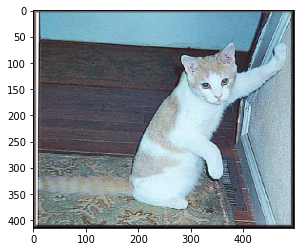

In [5]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

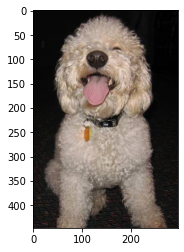

In [6]:
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [7]:
import tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, Activation

from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
train_data_dir = r"/content/training_set/training_set"
validation_data_dir = r"/content/test_set/test_set"
nb_train_samples = 100
nb_validation_samples = 100
img_width, img_height = 224,224 
epochs = 20
batch_size = 20

In [9]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height) # fixing the input shape basis the input images. 
else:
    input_shape=(img_width,img_height,3)

In [10]:
train_datagen = ImageDataGenerator(rescale=1. /255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. /255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (img_width,img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    classes=['cats','dogs']
                                                    )

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                              target_size =(img_width,img_height),
                                                              batch_size=batch_size,
                                                              class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


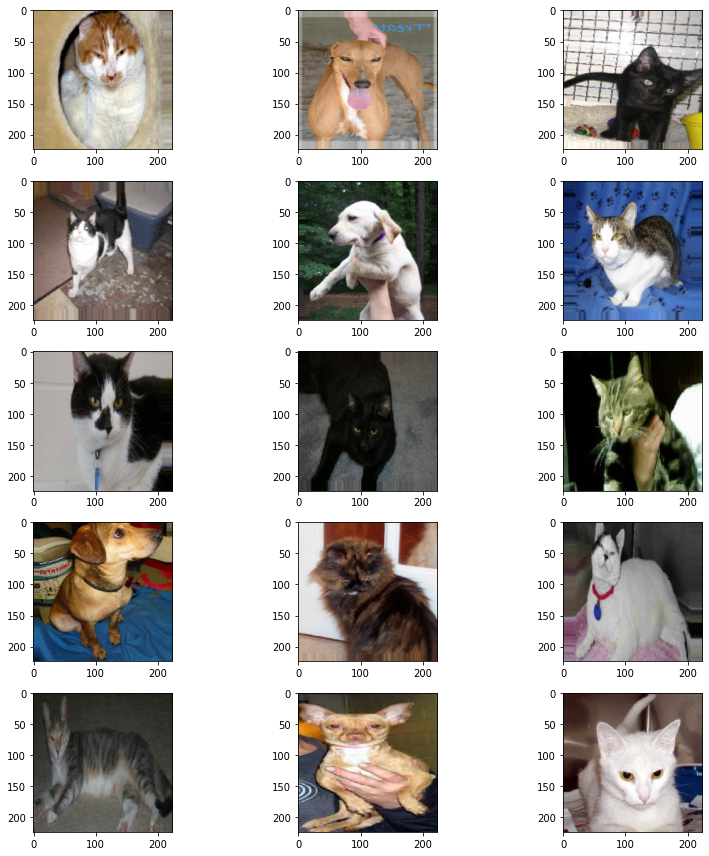

In [11]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
  plt.subplot(5, 3, i+1)
  for X_batch, Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [12]:
import numpy as np
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D

In [13]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [14]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [15]:
training=model.fit(train_generator,
                   steps_per_epoch=nb_train_samples,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 43s 382ms/step - loss: 1.0856 - accuracy: 0.4980 - val_loss: 0.8737 - val_accuracy: 0.5570
Epoch 2/20
100/100 [==============================] - 38s 382ms/step - loss: 0.8191 - accuracy: 0.5145 - val_loss: 0.7014 - val_accuracy: 0.5240
Epoch 3/20
100/100 [==============================] - 38s 378ms/step - loss: 0.7725 - accuracy: 0.5200 - val_loss: 0.6984 - val_accuracy: 0.5610
Epoch 4/20
100/100 [==============================] - 38s 377ms/step - loss: 0.7432 - accuracy: 0.5425 - val_loss: 0.7462 - val_accuracy: 0.5295
Epoch 5/20
100/100 [==============================] - 37s 374ms/step - loss: 0.7549 - accuracy: 0.5185 - val_loss: 0.7050 - val_accuracy: 0.5485
Epoch 6/20
100/100 [==============================] - 37s 375ms/step - loss: 0.7517 - accuracy: 0.5078 - val_loss: 0.7689 - val_accuracy: 0.5315
Epoch 7/20
100/100 [==============================] - 37s 375ms/step - loss: 0.7217 - accuracy: 0.5340 - val_loss: 0.7208 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


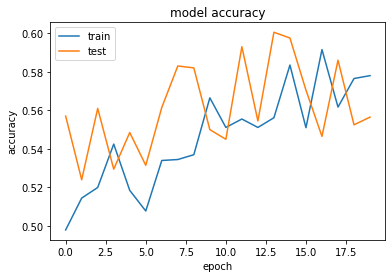

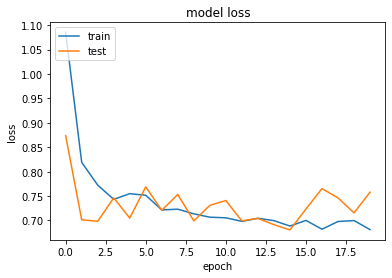

In [16]:
# let's visualize the accuracy. 
# This is the same function we used in our last use case of ANN (MNIST dataset.)

# importing library. 
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.]]
Prediction:  Cat


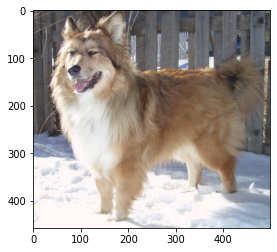

In [17]:
# import the libraries. 
from tensorflow.keras.preprocessing import image
import numpy as np

# load a sample image 
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4006.jpg",target_size=(224,224))

# represent the sample test image in form of a matrix. 
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

# capturing the results from our model. 
rslt = model.predict(img_pred) # similar .predict() function is used here, just like we used in ANN or ML. 

# print the results.
# the results from the network will be a number : 0 or 1. 
# we have to manually convert it back into a readable format. 
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

# also along with the predictions display the same image. 
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


[[0.]]
Prediction:  Cat


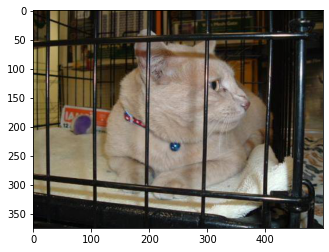

In [18]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4008.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4008.jpg')
imgplot = plt.imshow(img)
plt.show()

***Trying RMSProp optimizer in same models***

In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [21]:
training=model.fit(train_generator,
                   steps_per_epoch=nb_train_samples,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 42s 391ms/step - loss: 0.7284 - accuracy: 0.5145 - val_loss: 2.1899 - val_accuracy: 0.5040
Epoch 2/20
100/100 [==============================] - 39s 389ms/step - loss: 0.7128 - accuracy: 0.5335 - val_loss: 1.2525 - val_accuracy: 0.5260
Epoch 3/20
100/100 [==============================] - 38s 382ms/step - loss: 0.7080 - accuracy: 0.5249 - val_loss: 0.7115 - val_accuracy: 0.5320
Epoch 4/20
100/100 [==============================] - 39s 386ms/step - loss: 0.7054 - accuracy: 0.5470 - val_loss: 1.5612 - val_accuracy: 0.5645
Epoch 5/20
100/100 [==============================] - 39s 388ms/step - loss: 0.7060 - accuracy: 0.5295 - val_loss: 0.7340 - val_accuracy: 0.4915
Epoch 6/20
100/100 [==============================] - 38s 381ms/step - loss: 0.7086 - accuracy: 0.5259 - val_loss: 0.7211 - val_accuracy: 0.4940
Epoch 7/20
100/100 [==============================] - 38s 381ms/step - loss: 0.7115 - accuracy: 0.5325 - val_loss: 0.9137 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


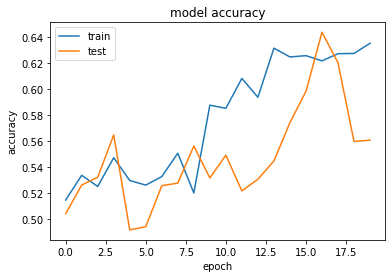

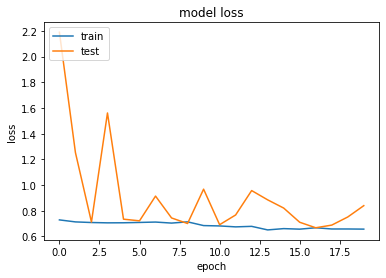

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[1.]]
Prediction:  Dog


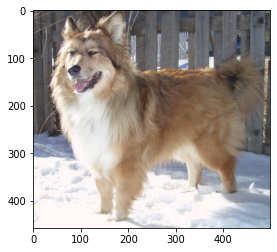

In [23]:
# import the libraries. 
from tensorflow.keras.preprocessing import image
import numpy as np

# load a sample image 
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4006.jpg",target_size=(224,224))

# represent the sample test image in form of a matrix. 
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

# capturing the results from our model. 
rslt = model.predict(img_pred) # similar .predict() function is used here, just like we used in ANN or ML. 

# print the results.
# the results from the network will be a number : 0 or 1. 
# we have to manually convert it back into a readable format. 
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

# also along with the predictions display the same image. 
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


[[1.]]
Prediction:  Dog


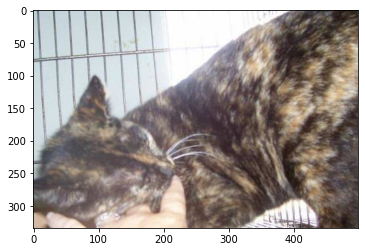

In [24]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4006.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4006.jpg')
imgplot = plt.imshow(img)
plt.show()

 ***Trying SGD optimizer in same models***

In [25]:
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [26]:
training=model.fit(train_generator,
                   steps_per_epoch=nb_train_samples,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 39s 371ms/step - loss: 0.6531 - accuracy: 0.6355 - val_loss: 0.6374 - val_accuracy: 0.6180
Epoch 2/20
100/100 [==============================] - 37s 371ms/step - loss: 0.6426 - accuracy: 0.6385 - val_loss: 0.6350 - val_accuracy: 0.6425
Epoch 3/20
100/100 [==============================] - 37s 372ms/step - loss: 0.6398 - accuracy: 0.6400 - val_loss: 0.6095 - val_accuracy: 0.6670
Epoch 4/20
100/100 [==============================] - 37s 368ms/step - loss: 0.6331 - accuracy: 0.6460 - val_loss: 0.6374 - val_accuracy: 0.6435
Epoch 5/20
100/100 [==============================] - 37s 371ms/step - loss: 0.6259 - accuracy: 0.6430 - val_loss: 0.6455 - val_accuracy: 0.6510
Epoch 6/20
100/100 [==============================] - 37s 368ms/step - loss: 0.6236 - accuracy: 0.6519 - val_loss: 0.6897 - val_accuracy: 0.6005
Epoch 7/20
100/100 [==============================] - 37s 370ms/step - loss: 0.6335 - accuracy: 0.6514 - val_loss: 0.6440 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


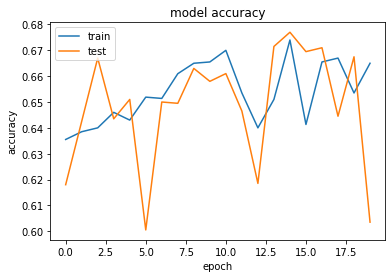

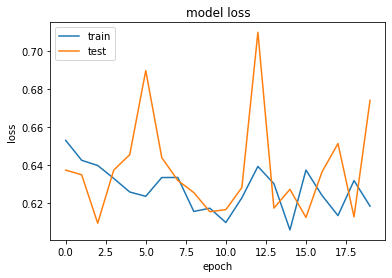

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.]]
Prediction:  Cat


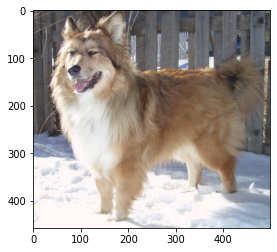

In [28]:
# import the libraries. 
from tensorflow.keras.preprocessing import image
import numpy as np

# load a sample image 
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4006.jpg",target_size=(224,224))

# represent the sample test image in form of a matrix. 
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

# capturing the results from our model. 
rslt = model.predict(img_pred) # similar .predict() function is used here, just like we used in ANN or ML. 

# print the results.
# the results from the network will be a number : 0 or 1. 
# we have to manually convert it back into a readable format. 
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

# also along with the predictions display the same image. 
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


[[0.]]
Prediction:  Cat


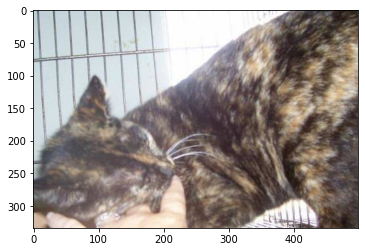

In [29]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4006.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4006.jpg')
imgplot = plt.imshow(img)
plt.show()

In [30]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_9 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_10 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)        

In [31]:
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [32]:
training=model.fit(train_generator,
                   steps_per_epoch=nb_train_samples,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 39s 373ms/step - loss: 0.8544 - accuracy: 0.5145 - val_loss: 0.7143 - val_accuracy: 0.5010
Epoch 2/20
100/100 [==============================] - 37s 367ms/step - loss: 0.7968 - accuracy: 0.5170 - val_loss: 0.6806 - val_accuracy: 0.5510
Epoch 3/20
100/100 [==============================] - 37s 366ms/step - loss: 0.7629 - accuracy: 0.5234 - val_loss: 0.6831 - val_accuracy: 0.5600
Epoch 4/20
100/100 [==============================] - 37s 367ms/step - loss: 0.7325 - accuracy: 0.5365 - val_loss: 0.6797 - val_accuracy: 0.5720
Epoch 5/20
100/100 [==============================] - 37s 366ms/step - loss: 0.7283 - accuracy: 0.5098 - val_loss: 0.6765 - val_accuracy: 0.5535
Epoch 6/20
100/100 [==============================] - 37s 370ms/step - loss: 0.7127 - accuracy: 0.5320 - val_loss: 0.6735 - val_accuracy: 0.5535
Epoch 7/20
100/100 [==============================] - 37s 367ms/step - loss: 0.7025 - accuracy: 0.5485 - val_loss: 0.6718 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


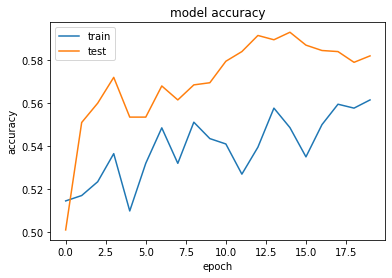

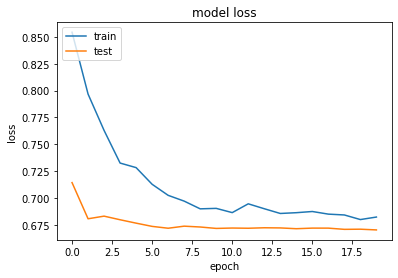

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.]]
Prediction:  Cat


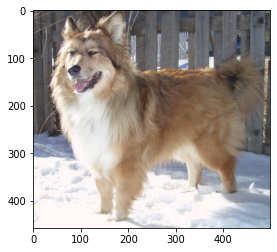

In [34]:
# import the libraries. 
from tensorflow.keras.preprocessing import image
import numpy as np

# load a sample image 
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4006.jpg",target_size=(224,224))

# represent the sample test image in form of a matrix. 
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

# capturing the results from our model. 
rslt = model.predict(img_pred) # similar .predict() function is used here, just like we used in ANN or ML. 

# print the results.
# the results from the network will be a number : 0 or 1. 
# we have to manually convert it back into a readable format. 
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

# also along with the predictions display the same image. 
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


[[0.]]
Prediction:  Cat


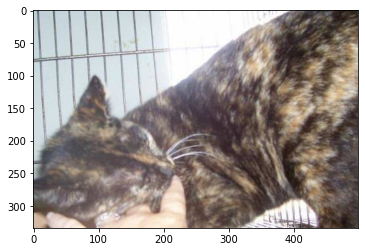

In [35]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4006.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4006.jpg')
imgplot = plt.imshow(img)
plt.show()